In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False

# RFM 분석

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## (1) 데이터 탐색 및 전처리

In [4]:
# 데이터 불러오기
customer_df = pd.read_csv('customer_data.csv', sep='\t')
customer_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


In [5]:
pd.set_option('display.max_columns', None)
customer_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [6]:
customer_df.shape

(2240, 23)

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [8]:
columns_object_dtype = customer_df.columns[customer_df.dtypes == 'object']
columns_object_dtype

Index(['signup_ym', 'marital_status'], dtype='object')

In [9]:
for col in columns_object_dtype:
    unique_values = sorted(customer_df[col].unique())
    print(f"{col} : {len(unique_values)}개")
    print(unique_values, '\n')

signup_ym : 24개
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status : 4개
['미혼', '배우자 있음', '사별', '이혼'] 



In [10]:
customer_df.isna().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [11]:
# 결측치가 전체 데이터의 1% 수준이므로 결측치 제거
customer_df['annual_income'].isna().sum() / customer_df.shape[0] * 100

np.float64(1.0714285714285714)

In [12]:
customer_df = customer_df.dropna()
customer_df.isna().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

In [13]:
customer_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [14]:
customer_df['birth_year'] = 2024 - customer_df['birth_year']
customer_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [15]:
customer_df = customer_df.rename(columns={'birth_year' : 'age'})
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [16]:
data_amount_total = (
    customer_df['amount_alcohol']
    + customer_df['amount_fruit']
    + customer_df['amount_meat']
    + customer_df['amount_fish']
    + customer_df['amount_snack']
    + customer_df['amount_general']
)

In [17]:
index_amount_general = customer_df.columns.get_loc('amount_general')
index_amount_general

12

In [18]:
customer_df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=data_amount_total
)
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,0,0,0,0,0,0,11


In [19]:
num_purchase_total = (
    customer_df['num_purchase_web']
    + customer_df['num_purchase_store']
    + customer_df['num_purchase_discount']
)

In [20]:
index_num_purchase_discount = customer_df.columns.get_loc('num_purchase_discount')
index_num_purchase_discount

16

In [21]:
customer_df.insert(
    loc=index_num_purchase_discount + 1,
    column='num_purchase_total',
    value=num_purchase_total
)
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


In [22]:
customer_df['revenue'].describe()

count    2216.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: revenue, dtype: float64

In [23]:
customer_df = customer_df.drop(columns=['ID', 'revenue'])
customer_df.head()

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


In [24]:
customer_df.shape

(2216, 23)

## (2) 인구통계학적 고객 정보 분석

Text(0, 0.5, '고객 수 (명)')

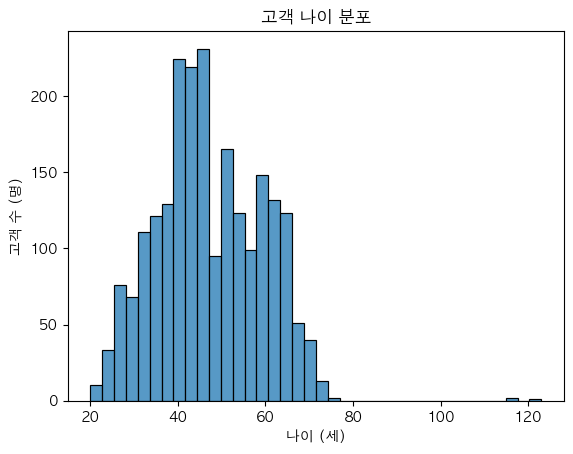

In [25]:
sns.histplot(data=customer_df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이 (세)')
plt.ylabel('고객 수 (명)')

- 위 히스토그램을 보았을 때 30대 후반에서 40대 초반 고객의 수가 많은 것으로 보이고, 20대와 70대에 가까워질수록 점점 고객의 수가 줄어들고 있음
- 나이가 120세에 가까운 고객이 몇 명 있는데 생물학적으로 불가능에 가까운 데이터라서 추가 확인 필요

In [26]:
customer_df.sort_values(by='age', ascending=False)

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
239,2022-08,123,78236600.0,미혼,1,23,10400,0,6500,9100,0,2600,28600,1,2,1,4,0,0,0,0,0,0
339,2021-12,117,108591600.0,배우자 있음,0,36,981500,187200,730600,135200,83200,291200,2408900,4,4,1,9,0,0,0,0,1,0
192,2021-12,116,47632000.0,이혼,1,99,19500,7800,10400,9100,5200,32500,84500,2,2,1,5,0,0,0,0,0,0
1950,2021-10,76,66483300.0,미혼,0,96,187200,0,9100,0,0,7800,204100,3,4,1,8,0,0,0,0,0,0
424,2021-07,75,120935100.0,배우자 있음,0,77,1670500,54600,930800,71500,0,27300,2754700,7,5,0,12,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2022-06,21,92511900.0,미혼,0,30,367900,22100,483600,179400,137800,57200,1248000,3,12,1,16,0,0,0,0,0,0
2213,2021-01,21,104802100.0,미혼,0,42,772200,66300,820300,93600,71500,41600,1865500,4,8,1,13,0,0,0,0,0,0
1850,2020-12,21,108234100.0,미혼,0,56,696800,35100,767000,49400,139100,87100,1774500,5,12,1,18,0,0,1,0,1,1
1170,2022-05,20,18747300.0,배우자 있음,0,81,0,0,2600,3900,3900,10400,20800,1,2,1,4,0,0,1,0,0,0


In [27]:
customer_df = customer_df[customer_df['age'] < 100]

Text(0, 0.5, '고객 수 (명)')

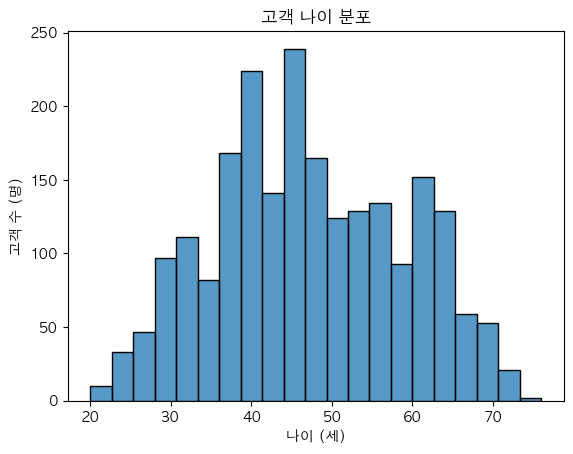

In [28]:
sns.histplot(data=customer_df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이 (세)')
plt.ylabel('고객 수 (명)')

In [29]:
age_bins = list(range(10, 81, 10))
age_bins

[10, 20, 30, 40, 50, 60, 70, 80]

In [30]:
age_labels = [f"{x}대" for x in age_bins[:-1]]
age_labels

['10대', '20대', '30대', '40대', '50대', '60대', '70대']

In [31]:
age_group = pd.cut(x=customer_df['age'], bins=age_bins, labels=age_labels, right=False)
age_group

0       50대
1       60대
2       50대
3       30대
4       30대
       ... 
2235    40대
2236    70대
2237    30대
2238    60대
2239    60대
Name: age, Length: 2213, dtype: category
Categories (7, object): ['10대' < '20대' < '30대' < '40대' < '50대' < '60대' < '70대']

In [32]:
index_age_group = customer_df.columns.get_loc('age')
index_age_group

1

In [33]:
customer_df.insert(
    loc=index_age_group + 1,
    column='age_group',
    value=age_group
)

customer_df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,59,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,62,60대,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,51,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,2022-05,32,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,2022-04,35,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


In [34]:
customer_df['age_group'].value_counts()

age_group
40대    717
50대    480
30대    454
60대    377
20대    146
70대     39
10대      0
Name: count, dtype: int64

- 10대와 70개의 숫자가 너무 적어 특정 연령대에서 표본의 수가 너무 적으면 해당 연령대에 대한 통계 수치의 신뢰성이 떨어지고 분석 결과가 왜곡되므로
- 10대와 20대를 20대 이하로, 60대와 70대를 60대 이상으로 바꾸어 연령대 값을 새롭게 구함

In [35]:
age_group_replace_dict = {
    '10대' : '20대 이하',
    '20대' : '20대 이하',
    '60대' : '60대 이상',
    '70대' : '60대 이상'
}

customer_df['age_group'] = customer_df['age_group'].replace(age_group_replace_dict)

/var/folders/yl/lyd4cgp16bj2jd049cmb64n00000gn/T/ipykernel_50257/147013724.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  customer_df['age_group'] = customer_df['age_group'].replace(age_group_replace_dict)


In [36]:
customer_df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,59,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,62,60대 이상,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,51,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,2022-05,32,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,2022-04,35,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


In [37]:
customer_df['age_group'].value_counts()

age_group
40대       717
50대       480
30대       454
60대 이상    416
20대 이하    146
Name: count, dtype: int64

Text(0, 0.5, '고객 수 (명)')

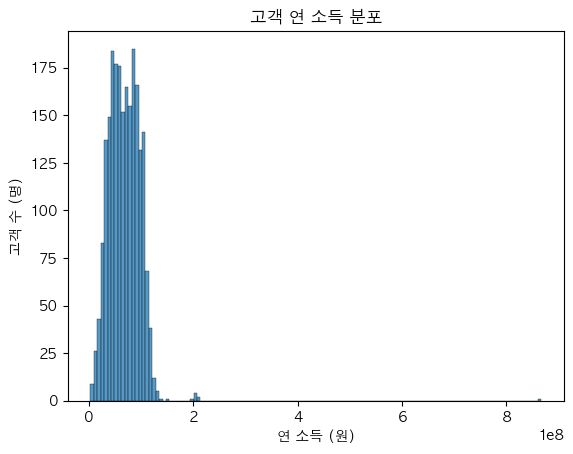

In [38]:
sns.histplot(data=customer_df['annual_income'])
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득 (원)')
plt.ylabel('고객 수 (명)')

이상치가 존재하는 것 같아 상자 그림을 그려서 이상치를 확인

<Axes: xlabel='annual_income'>

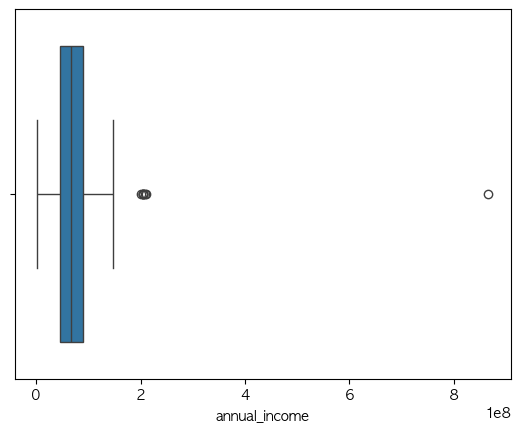

In [39]:
sns.boxplot(data=customer_df, x='annual_income')

In [40]:
# IQR 방식을 사용하여 이상치 제거

income = customer_df['annual_income']

q3 = income.quantile(0.75)
q1 = income.quantile(0.25)

iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

normal_condition = (income >= lower_limit) & (income <= upper_limit)
customer_df = customer_df[normal_condition]

## RFM 고객 세그먼트 분류

In [41]:
num_grades = 3

grade_labels = list(range(1, num_grades + 1))
grade_labels

[1, 2, 3]

- Recency
  - 값이 작을수록 등급이 높아짐
- Frequency
  - 값이 클수록 등급이 높아짐
- Monetary
   - 값이 클수록 등급이 높아짐

In [42]:
grade_labels[::-1]

[3, 2, 1]

In [44]:
recency_grade = pd.qcut(x=customer_df['recency'], q=num_grades, labels=grade_labels[::-1])
customer_df['recency_grade'] = recency_grade

In [45]:
customer_df['recency_grade'].value_counts()

recency_grade
3    752
1    730
2    723
Name: count, dtype: int64

In [46]:
customer_df.groupby('recency_grade').sum(numeric_only = True). reset_index()

/var/folders/yl/lyd4cgp16bj2jd049cmb64n00000gn/T/ipykernel_50257/2386665878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_df.groupby('recency_grade').sum(numeric_only = True). reset_index()


,recency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,3,35078,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,25539800,42485300,583858600,3103,4386,1693,9182,54,12,67,55,60,179
1,2,34460,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,25147200,41268500,570953500,2992,4240,1771,9003,47,8,47,52,48,95
2,1,34308,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,27076400,42536000,584642500,2947,4215,1648,8810,41,10,49,57,53,59


In [48]:
groupby_recency_grade = customer_df.groupby('recency_grade').sum(numeric_only=True).reset_index()
groupby_recency_grade

/var/folders/yl/lyd4cgp16bj2jd049cmb64n00000gn/T/ipykernel_50257/2461487909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_recency_grade = customer_df.groupby('recency_grade').sum(numeric_only=True).reset_index()


,recency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,3,35078,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,25539800,42485300,583858600,3103,4386,1693,9182,54,12,67,55,60,179
1,2,34460,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,25147200,41268500,570953500,2992,4240,1771,9003,47,8,47,52,48,95
2,1,34308,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,27076400,42536000,584642500,2947,4215,1648,8810,41,10,49,57,53,59


<Axes: title={'center': 'Recency 등급별 매출 기여도'}>

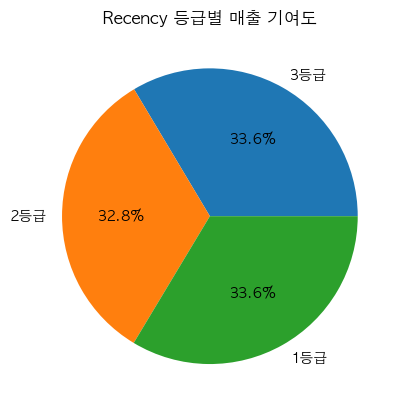

In [49]:
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title='Recency 등급별 매출 기여도',
    ylabel=''
)

In [50]:
customer_df['frequency_grade'] = pd.qcut(
    x=customer_df['num_purchase_total'],
    q=num_grades,
    labels=grade_labels)

In [51]:
customer_df['frequency_grade'].value_counts()

frequency_grade
1    851
2    679
3    675
Name: count, dtype: int64

In [52]:
groupby_frequency_grade = customer_df.groupby('frequency_grade').sum(numeric_only=True)
groupby_frequency_grade

/var/folders/yl/lyd4cgp16bj2jd049cmb64n00000gn/T/ipykernel_50257/3145600357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_frequency_grade = customer_df.groupby('frequency_grade').sum(numeric_only=True)


,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
frequency_grade,,,,,,,,,,,,,,,,,,,,,
1,37843,3.888393e+10,989,41579,55630900,7387900,38834900,10792600,7022600,17867200,137536100,1477,2560,1365,5402,7,3,61,8,7,80
2,32626,5.268116e+10,496,33525,342971200,32916000,220378600,47747700,33254000,50017500,727285000,2940,4021,1522,8483,69,14,54,69,87,130
3,33377,5.640964e+10,607,32961,479018800,35380800,214653400,49688600,37486800,58405100,874633500,4625,6260,2225,13110,66,13,48,87,67,123


<Axes: title={'center': 'Frequency 등급별 매출 기여도'}>

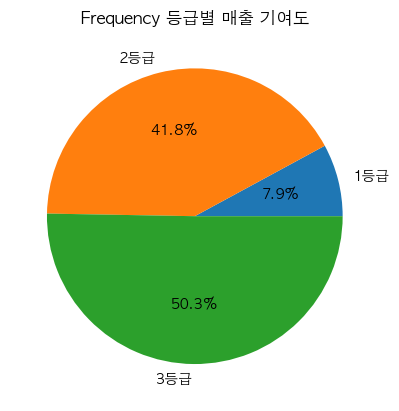

In [53]:
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Frequency 등급별 매출 기여도',
    ylabel=''
)

In [54]:
customer_df['monetary_grade'] = pd.qcut(
    x=customer_df['amount_total'],
    q=num_grades,
    labels=grade_labels
)

In [55]:
customer_df['monetary_grade'].value_counts()

monetary_grade
1    735
2    735
3    735
Name: count, dtype: int64

In [56]:
groupby_monetary_grade = customer_df.groupby('monetary_grade').sum(numeric_only=True)
groupby_monetary_grade

/var/folders/yl/lyd4cgp16bj2jd049cmb64n00000gn/T/ipykernel_50257/3053581088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_monetary_grade = customer_df.groupby('monetary_grade').sum(numeric_only=True)


,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
monetary_grade,,,,,,,,,,,,,,,,,,,,,
1,32221,2.984158e+10,944,35704,17254900,3122600,11546600,4572100,3257800,9497800,49251800,1170,2091,1307,4568,0,2,56,3,0,57
2,35655,4.868252e+10,814,35495,212998500,16786900,84479200,23622300,16887000,42303300,397077200,3683,4407,2365,10455,15,4,42,56,8,91
3,35970,6.945063e+10,334,36866,647367500,55775200,377841100,80034500,57618600,74488700,1293125600,4189,6343,1440,11972,127,24,65,105,153,185


<Axes: title={'center': 'Monetary 등급별 매출 기여도'}>

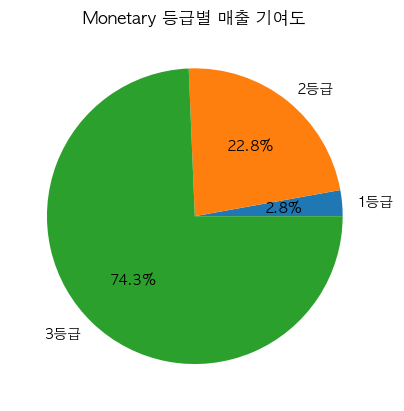

In [57]:
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    ylabel=''
)

In [58]:
weight = {}
weight['recency'] = 1/3
weight['frequency'] = 1/3
weight['monetary'] = 1/3
weight

{'recency': 0.3333333333333333,
 'frequency': 0.3333333333333333,
 'monetary': 0.3333333333333333}

In [59]:
customer_df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,recency_grade,frequency_grade,monetary_grade
0,2020-12,59,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,2,2,3
1,2022-06,62,60대 이상,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,2,1,1
2,2021-11,51,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,3,3,2
3,2022-05,32,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,3,1,1
4,2022-04,35,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,1,3,2


In [60]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   signup_ym              2205 non-null   object  
 1   age                    2205 non-null   int64   
 2   age_group              2205 non-null   category
 3   annual_income          2205 non-null   float64 
 4   marital_status         2205 non-null   object  
 5   children               2205 non-null   int64   
 6   recency                2205 non-null   int64   
 7   amount_alcohol         2205 non-null   int64   
 8   amount_fruit           2205 non-null   int64   
 9   amount_meat            2205 non-null   int64   
 10  amount_fish            2205 non-null   int64   
 11  amount_snack           2205 non-null   int64   
 12  amount_general         2205 non-null   int64   
 13  amount_total           2205 non-null   int64   
 14  num_purchase_web       2205 non-null   int64 

In [61]:
customer_df['rfm_score'] = (
  weight ['recency'] * customer_df['recency_grade'].astype('int')
  + weight['frequency'] *customer_df['frequency_grade'].astype('int')
  + weight['monetary']* customer_df['monetary_grade']. astype('int')
)

In [62]:
customer_df['rfm_score'].describe()

count    2205.000000
mean        1.976720
std         0.574077
min         1.000000
25%         1.666667
50%         2.000000
75%         2.333333
max         3.000000
Name: rfm_score, dtype: float64

- 고객 지표는 범위가 1 이상 3 이하
- Recency, Frequency, Monetary 모두 등급 값이 1,2,3으로 한정되어 있고, 각 가중치는 모두 더해서 1이라는 제약 조건이 있기 때문

In [64]:
customer_df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,recency_grade,frequency_grade,monetary_grade,rfm_score
0,2020-12,59,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,2,2,3,2.333333
1,2022-06,62,60대 이상,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,2,1,1,1.333333
2,2021-11,51,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,3,3,2,2.666667
3,2022-05,32,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,3,1,1,1.666667
4,2022-04,35,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,1,3,2,2.000000


In [65]:
def ref_segment_bins(x):
  if x <5 /3:
    return 1
  elif x<7/3:
    return 2
  else: 
    return 3

In [67]:
customer_df['rfm_segment'].apply(rfm_segment_bins)

KeyError: 'rfm_segment'

In [68]:
customer_df['rfm_segment'].value_counts()

KeyError: 'rfm_segment'

In [69]:
customer_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

KeyError: 'rfm_segment'

In [70]:
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel=''
)

NameError: name 'groupby_rfm_segment' is not defined

In [71]:
# 가중치 재설정
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

In [ ]:
# 가중합 계산
customer_df['rfm_score'] = (
  weight['recency'] * customer_df 
)